# Теорвер 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(rc={'figure.figsize':(16,9), 
            'figure.dpi': 600,
            'savefig.dpi': 1500})
sns.set_palette("flare")

### Основные определения

**Функция распределения** - такая функция, что $F_{\eta}(x) = P(\eta \leq x)$. Функция распределения обладает следущими свойствами:
- Неубывающая(следует из монотонности вероятности): $$ x_{1} < x_{2} \Rightarrow F_{\eta}(x_{1}) \leq F_{\eta}(x_{2}) $$
- Непрерывна справа в каждой точке: $$ F_{\eta}(x_{0}) = \lim_{x \to x_{0}+0} F_{\eta}(x) $$ 
    > При задании функции распределения строгим неравенством верна непрерывность слева
- Стремление к нулю при стремлении аргумента к минус бесконечности: $$ F_{\eta}(- \infty) = \lim_{x \to - \infty} F_{\eta}(x) = 0 $$
- Стремление к единице при стремлении аргумента к плюс бесконечности: $$ F_{\eta}(+ \infty ) = 1 $$
  
**Плотность распределения** - функция, позволяющая вычислить вероятность <<попадания>> случайной величины в некоторый интервал:
$$ P(\eta \in \left[ a, b \right]) = \int_{a}^{b} p(x) dx $$

### Нормальное распределение

Плотность распределения 
$$
p(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp(- \frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^{2})
$$
где $\mu$ - математическое ожидание, $\sigma^{2}$ - диспресия

##### Генерация случайных значений 

Сгенерировать случайные значения, распределённые нормально позволяет метод `.normal` класса `random` библиотеки numpy. Аргумент `loc` задаёт математическое ожидание $\mu$, аргумент `scale` задаёт стандартное отклонение $\sigma$(корень из дисперсии случайной величины)

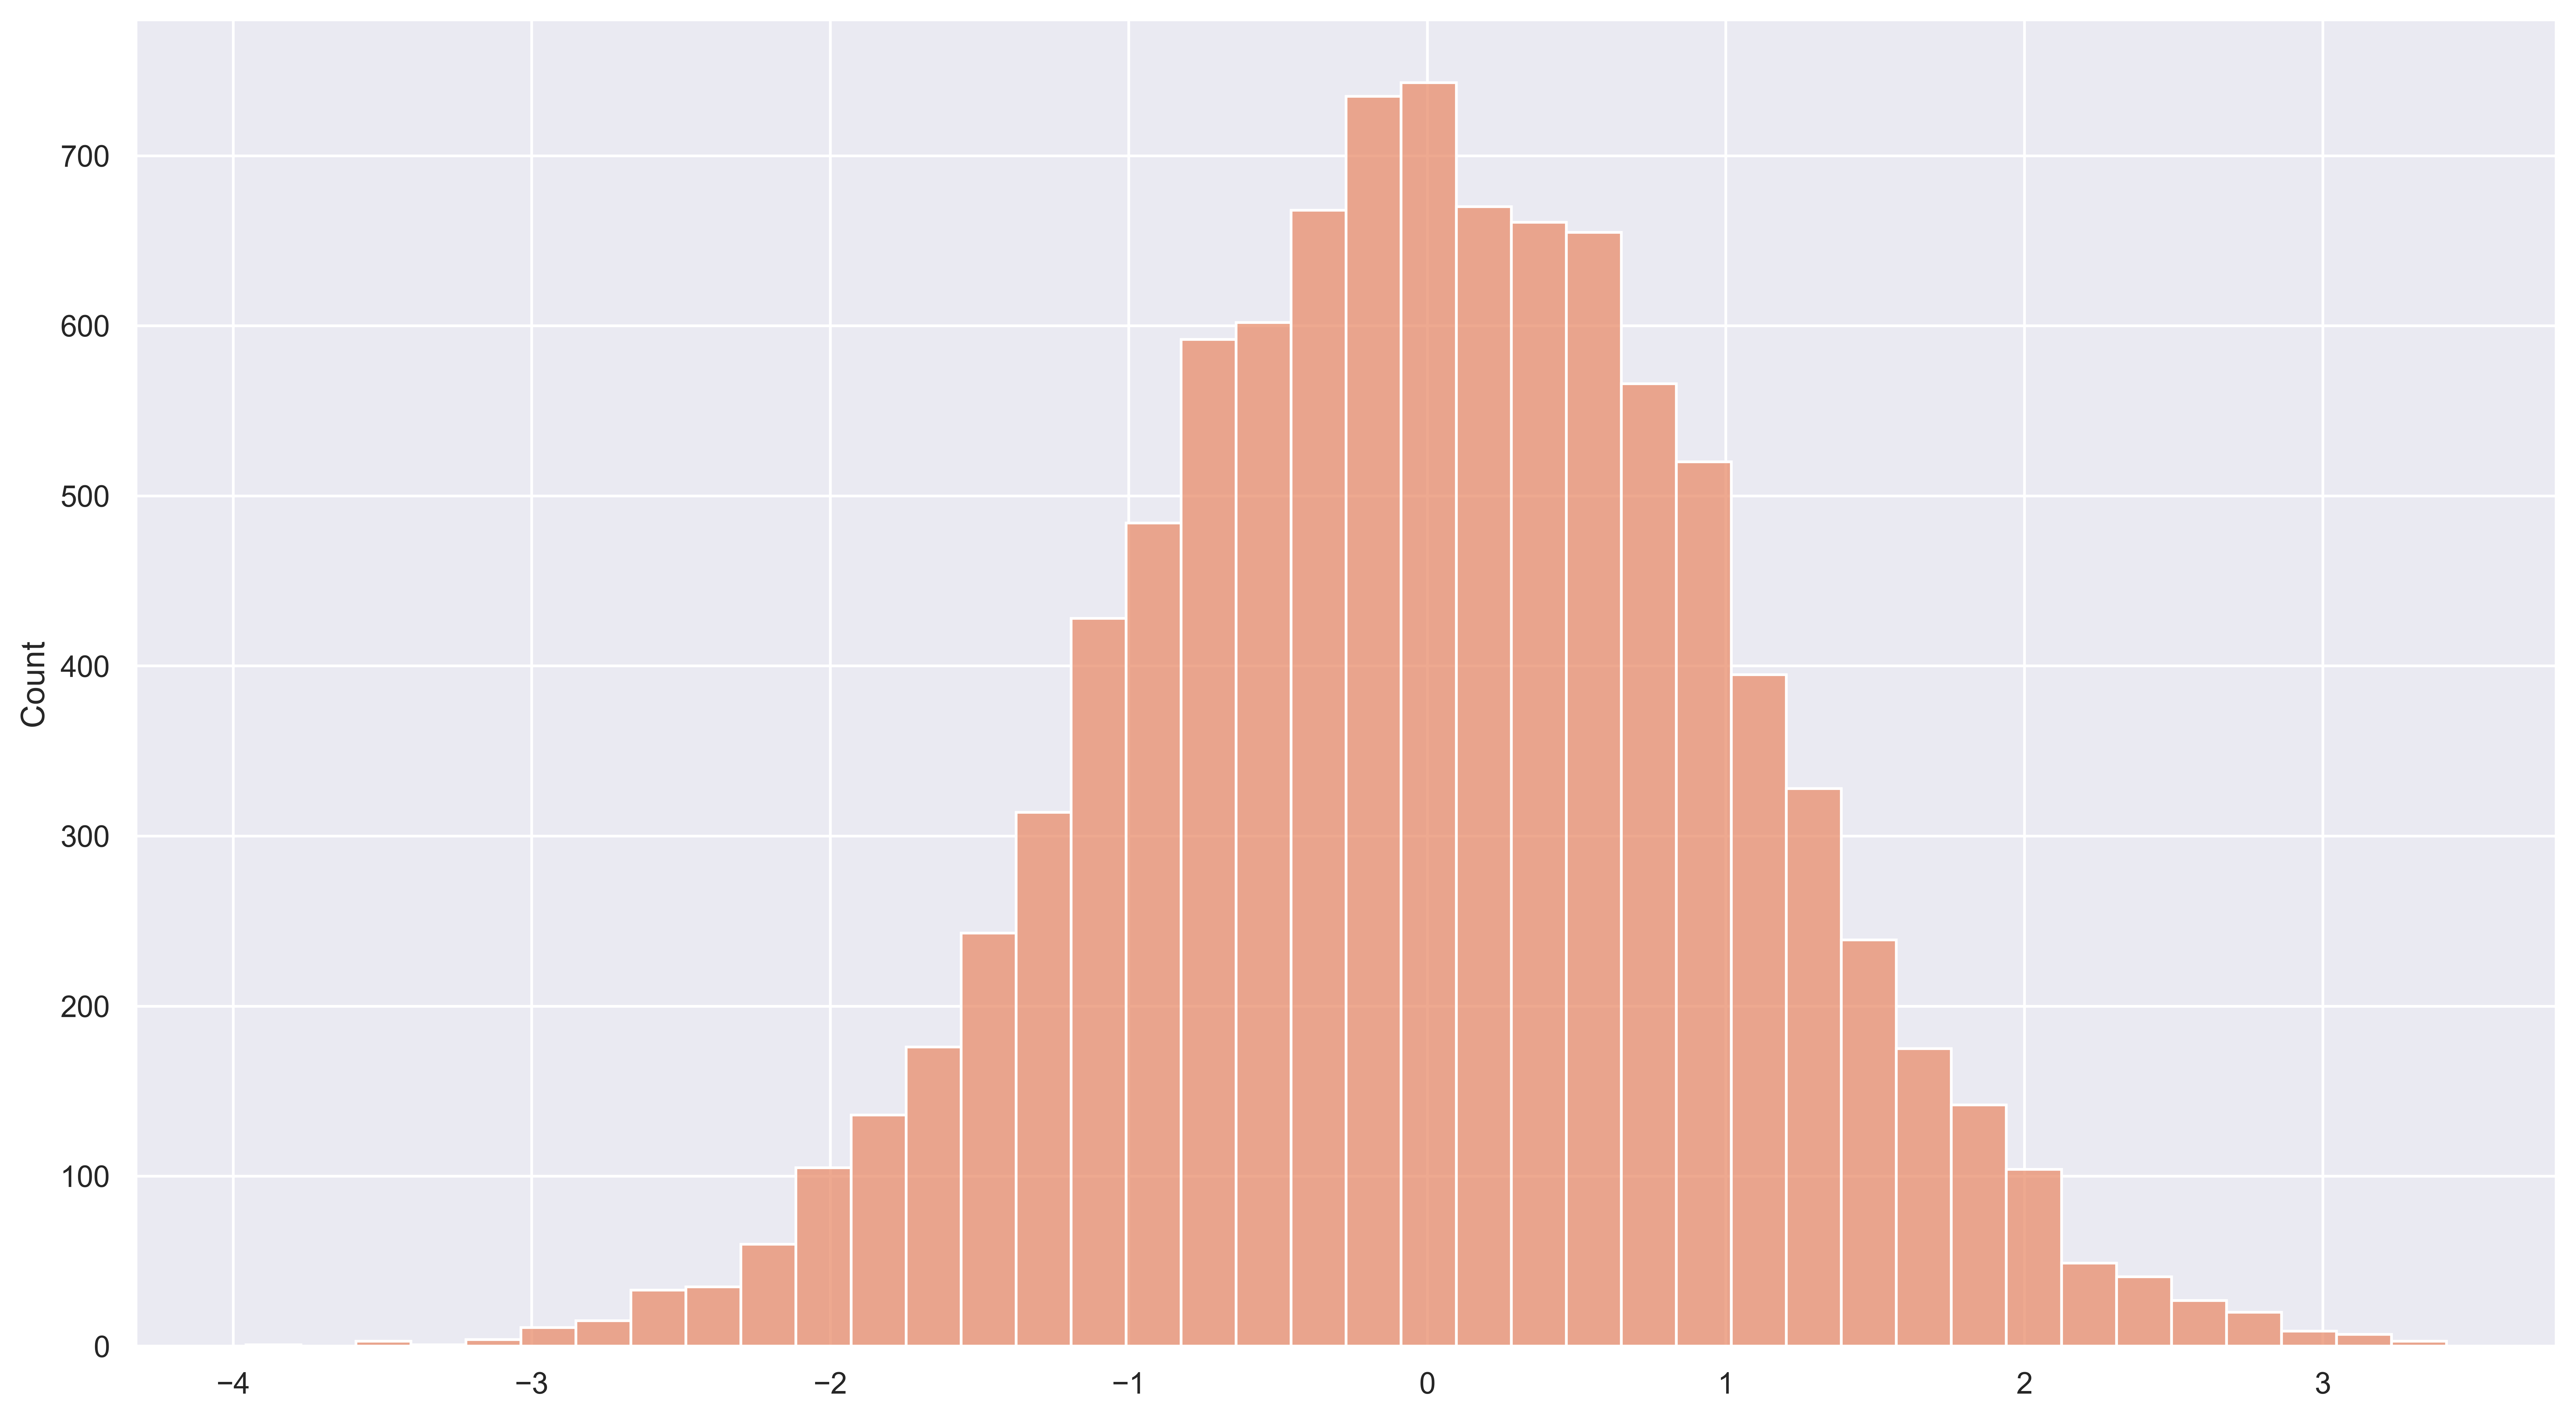

In [38]:
randomNormalValues = np.random.normal(loc = 0, scale = 1, size = 10000) 

sns.histplot(randomNormalValues, bins = 40, kde = False); #гистограмма( по оси x - значение, по оси y - количество чисел)

##### Оценка распределения

Допустим, график выше был получен в ходе некоторого эксперимента. Глядя на него, мы понимаем, что он похож на плотность вероятности нормально распредлённой случайной величины. Чтобы узнать параметры нормального распределения($\sigma$, $\mu$) воспользуемся методом `norm.fit()`, находящемся в модуле `stats` библиотеки `scipy`.

In [39]:
loc, scale = stats.norm.fit(randomNormalValues)
print("На графике изображено нормальное распределение с параметрами mu = {}, sigma = {}".format(loc,scale))

На графике изображено нормальное распределение с параметрами mu = 0.00467027754910062, sigma = 0.9985561264891153


Как видим, предсказание оказалось достаточно точным. 

Поместим оценочнуюс кривую на график. Для этого в метод `.histplot` достаточно передать функцию для оценки(по аргументу `fit`).
> метод почему-то не сработал 

Чтобы построить распредление с данными параметрами можно передать их в метод `pdf` - **print density function**. 

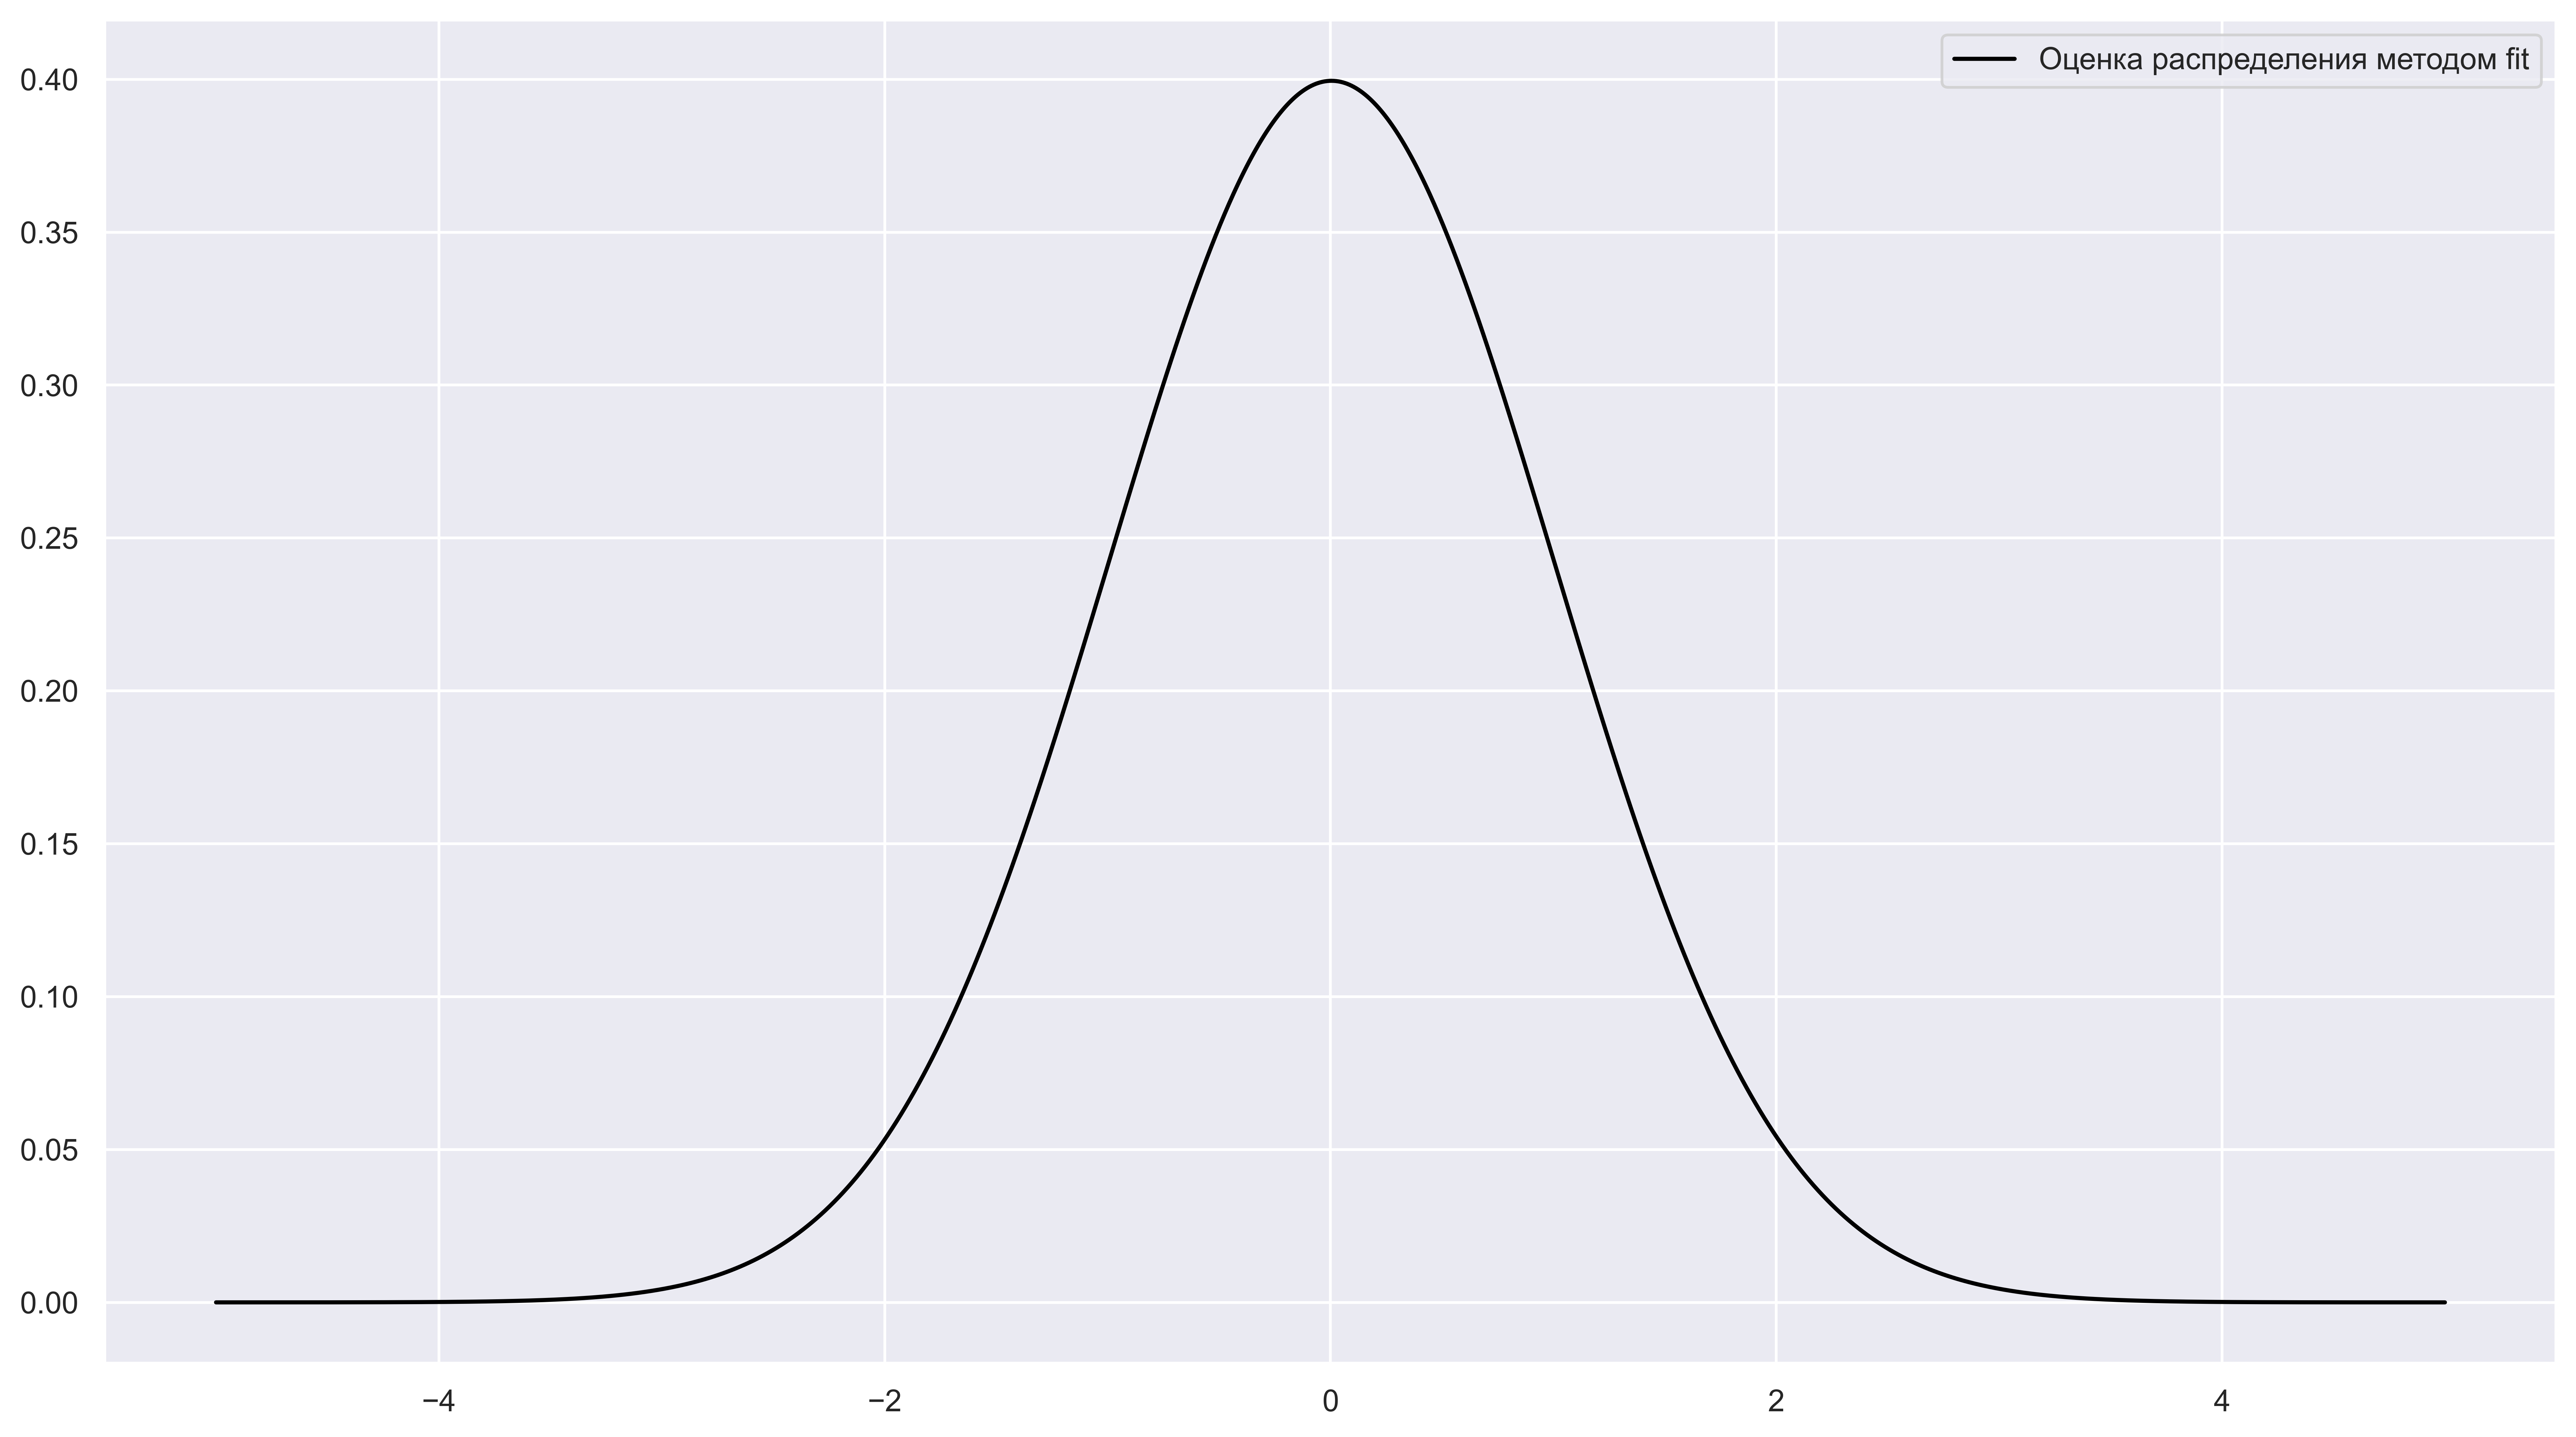

In [49]:
xAx = np.linspace(-5,5,1000)
fittedNormalDist = stats.norm.pdf(xAx, loc = loc, scale = scale)

fig, ax = plt.subplots(figsize = (16,9), dpi = 600)

plt.plot(xAx, fittedNormalDist, label = 'Оценка распределения методом fit', color = 'black')
plt.legend();

##### Функция распределения

Чтобы построить функцию распределения можно воспользоваться методом `cdf` - **cumulative distribution function**. 

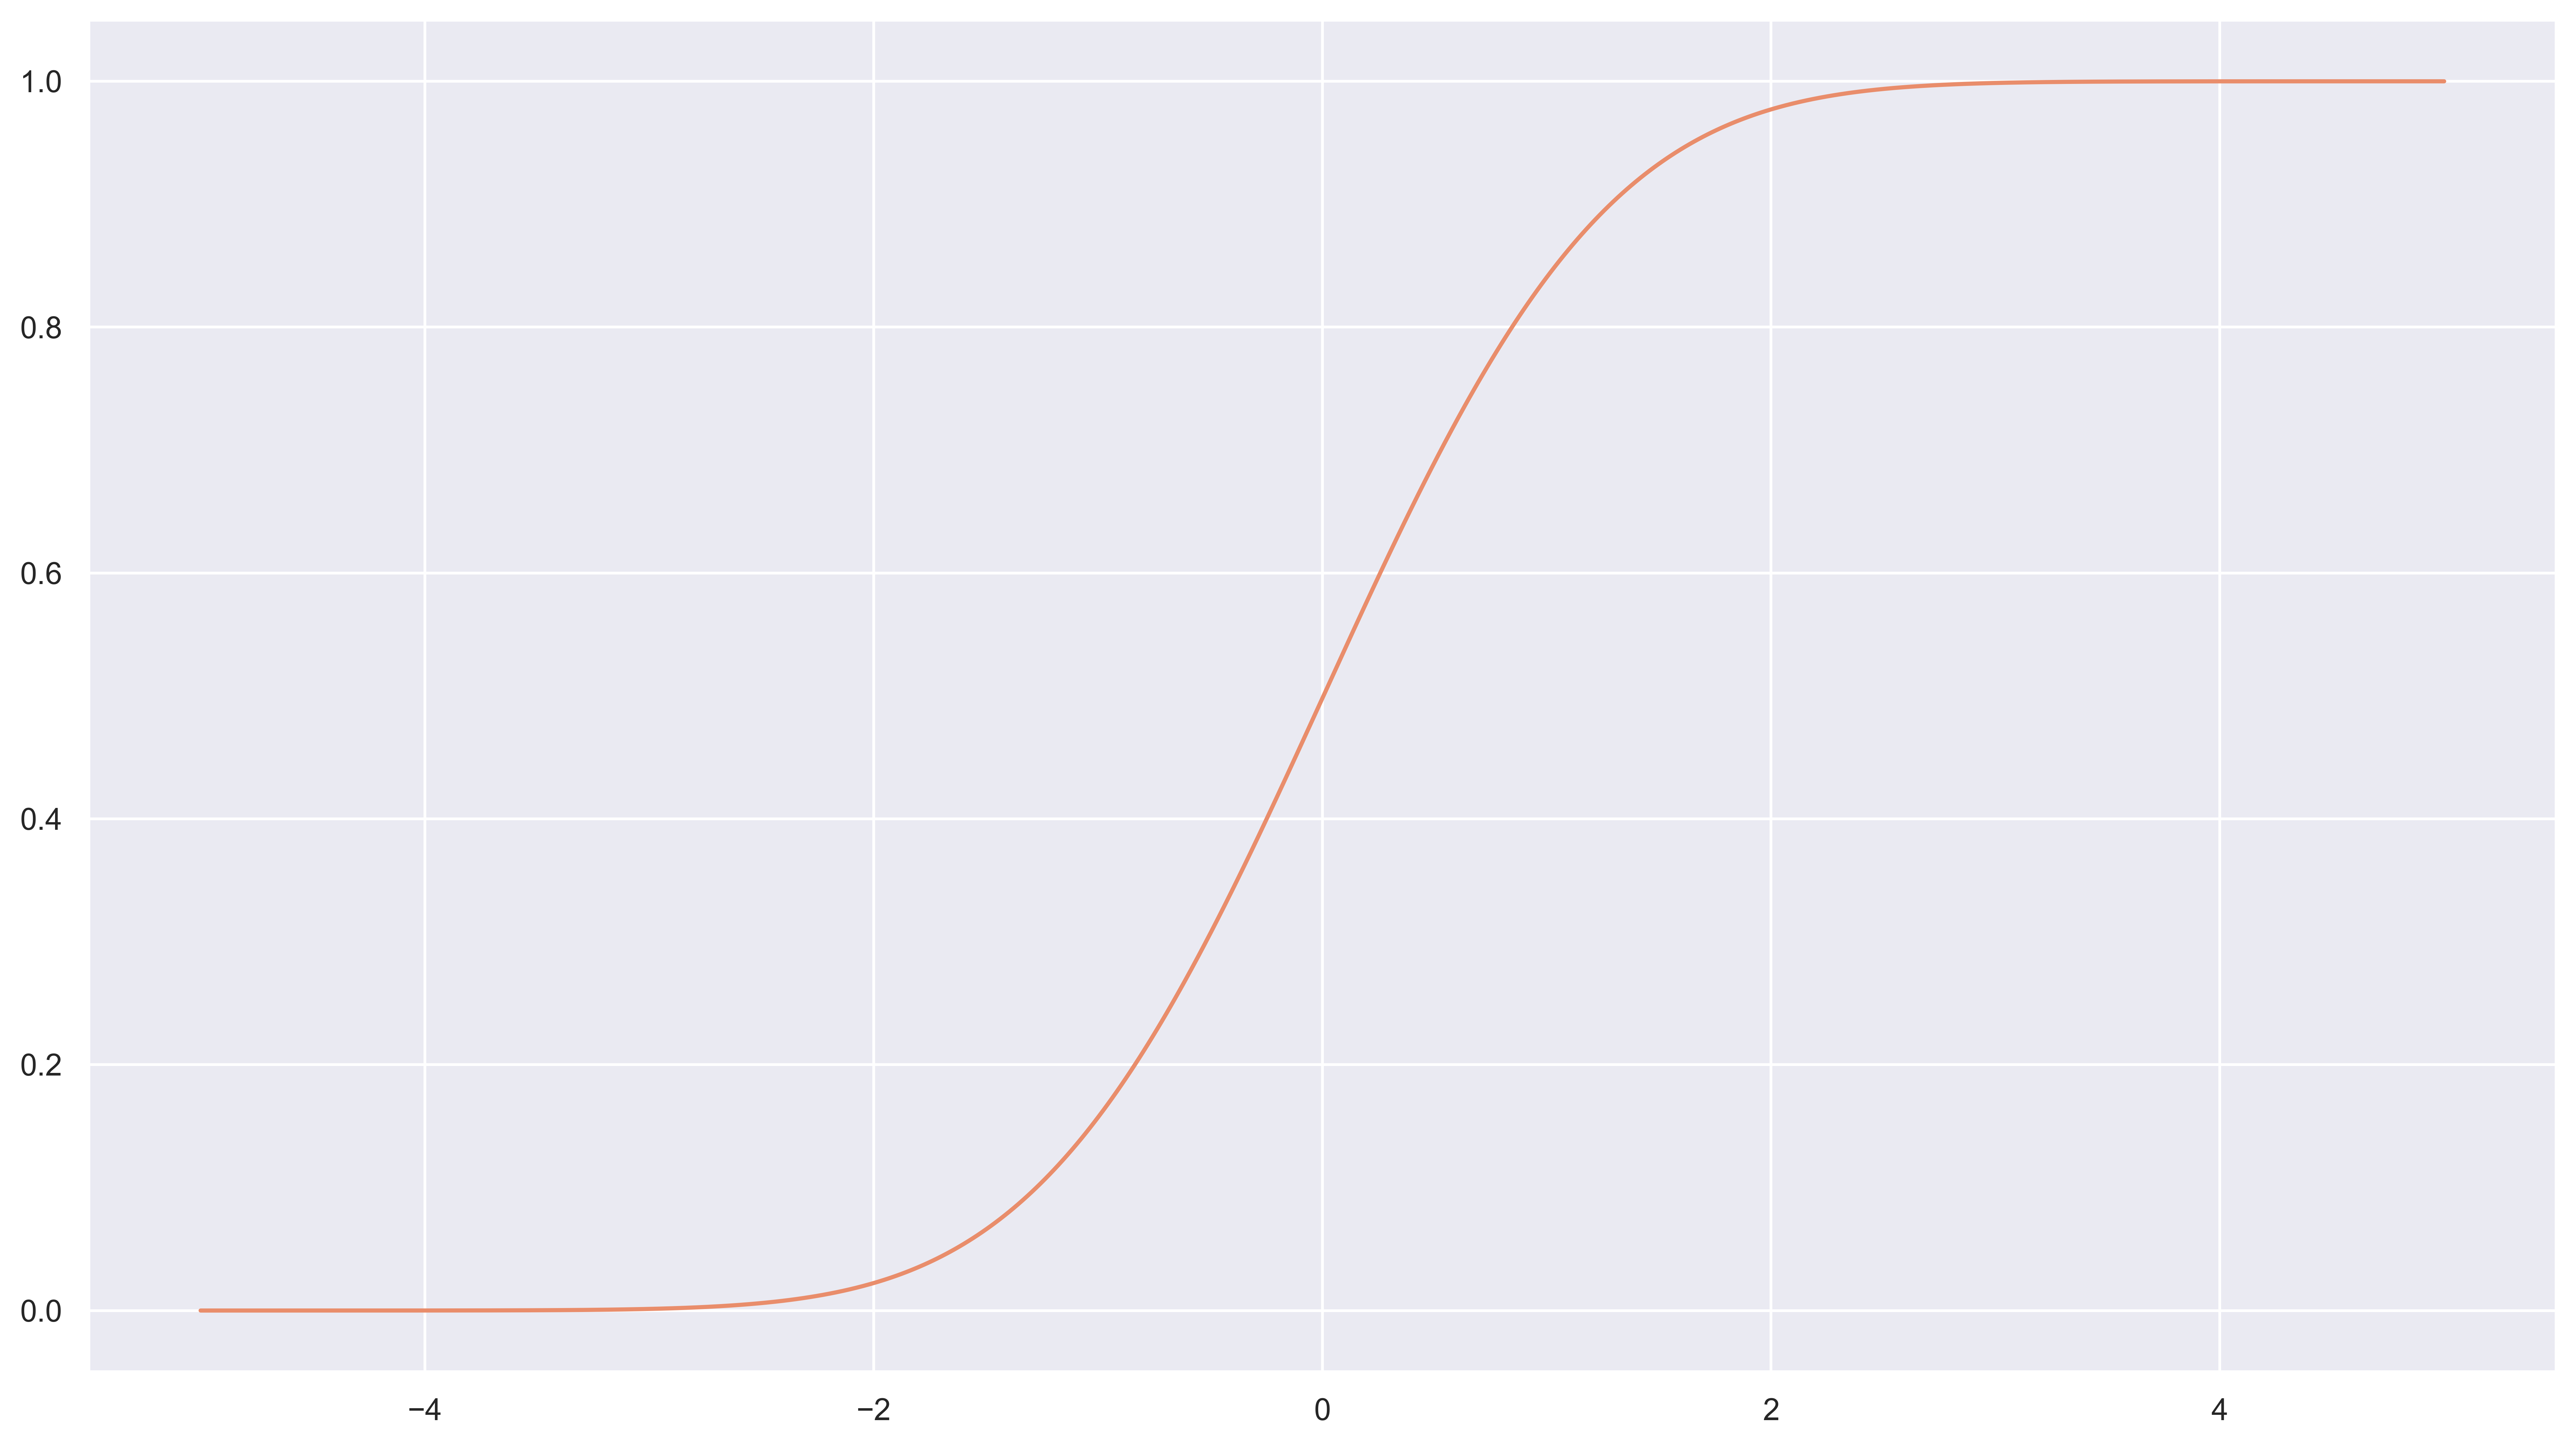

In [51]:
normDistFunction = stats.norm.cdf(xAx, loc = loc, scale = scale)

plt.plot(xAx, normDistFunction);